In [279]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

In [280]:
data = pd.read_csv("car.data")
print("\n",data.head(),"\n")


   buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc 



In [281]:
# Creating a dictionary to store the unique values of each column
unique_values = {}

# We go through each column and get unique values
for column in data.columns:
    unique_values[column] = data[column].unique().tolist()

# Output unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

buying: ['vhigh', 'high', 'med', 'low']
maint: ['vhigh', 'high', 'med', 'low']
door: ['2', '3', '4', '5more']
persons: ['2', '4', 'more']
lug_boot: ['small', 'med', 'big']
safety: ['low', 'med', 'high']
class: ['unacc', 'acc', 'vgood', 'good']


In [282]:
data = pd.read_csv("car.data")

buying_dict = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
maint_dict = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
doors_dict = {'2': 0, '3': 1, '4': 2, '5more': 3}
persons_dict = {'2': 0, '4': 1, 'more': 2}
lug_boot_dict = {'small': 0, 'med': 1, 'big': 2}
safety_dict = {'low': 0, 'med': 1, 'high': 2}
class_dict = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

data['buying'] = data['buying'].map(buying_dict)
data['maint'] = data['maint'].map(maint_dict)
data['door'] = data['door'].map(doors_dict)
data['persons'] = data['persons'].map(persons_dict)
data['lug_boot'] = data['lug_boot'].map(lug_boot_dict)
data['safety'] = data['safety'].map(safety_dict)
data['class'] = data['class'].map(class_dict)

print("\n",data.head(),"\n")


    buying  maint  door  persons  lug_boot  safety  class
0       3      3     0        0         0       0      0
1       3      3     0        0         0       1      0
2       3      3     0        0         0       2      0
3       3      3     0        0         1       0      0
4       3      3     0        0         1       1      0 



In [283]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))

# Dictionary for storing dependencies
label_dict = {
    "class": cls,
    "door": door,
    "persons": persons,
    "buying": buying,
    "maint": maint,
    "lug_boot": lug_boot,
    "safety": safety
}
print(data)

      buying  maint  door  persons  lug_boot  safety  class
0          3      3     0        0         0       0      0
1          3      3     0        0         0       1      0
2          3      3     0        0         0       2      0
3          3      3     0        0         1       0      0
4          3      3     0        0         1       1      0
...      ...    ...   ...      ...       ...     ...    ...
1723       0      0     3        2         1       1      2
1724       0      0     3        2         1       2      3
1725       0      0     3        2         2       0      0
1726       0      0     3        2         2       1      2
1727       0      0     3        2         2       2      3

[1728 rows x 7 columns]


In [284]:
le = preprocessing.LabelEncoder()

categorical_columns = ["buying", "maint", "door", "persons", "lug_boot", "safety", "class"]
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [285]:
# Choose the feature to predict based on user input
predict = "class"  # Replace with the desired feature

X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = label_dict[predict]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [286]:
model = KNeighborsClassifier(n_neighbors = 9)

# Train the KNN classifier (or other suitable model)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)

print("Accuracy: ", acc)

Accuracy:  0.953757225433526


In [287]:
# Make predictions on the test set
y_pred = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]



buying_dict = {0: 'low', 1: 'med', 2: 'high', 3: 'vhigh'}
maint_dict = {0: 'low', 1: 'med', 2: 'high', 3: 'vhigh'}
doors_dict = { 0: '2', 1: '3', 2: '4', 3: '5more'}
persons_dict = {0:'2', 1:'4', 2:'more'}
lug_boot_dict = {0: 'small', 1: 'med', 2: 'big'}
safety_dict = {0: 'low', 1: 'med', 2: 'high'}

print(f"{'Predicted':<10} {'Actual':<10} {'Buying':<6} {'Maint':<6} {'Door':<5} {'Persons':<8} {'Lug_boot':<8} {'Safety':<7}")

for x in range(len(y_pred)):
    
    test_data = list(x_test[x])
    
    test_data[0] = buying_dict[test_data[0]]
    test_data[1] = maint_dict[test_data[1]]
    test_data[2] = str(test_data[2])
    test_data[3] = str(test_data[3])
    test_data[4] = lug_boot_dict[test_data[4]]
    test_data[5] = safety_dict[test_data[5]]

    print(f"{names[y_pred[x]]:<10} {names[y_test[x]]:<10} {test_data[0]:<6} {test_data[1]:<6} {test_data[2]:<5} {test_data[3]:<8} {test_data[4]:<8} {test_data[5]:<7}")
    
    #n = model.kneighbors([x_test[x]], 9, True)
    #print("N: ", n)



Predicted  Actual     Buying Maint  Door  Persons  Lug_boot Safety 
unacc      unacc      high   high   3     0        big      med    
unacc      unacc      med    vhigh  3     2        small    low    
acc        acc        vhigh  med    2     1        small    high   
unacc      unacc      vhigh  med    2     0        big      med    
unacc      unacc      high   high   0     2        med      low    
unacc      unacc      low    low    0     2        med      low    
unacc      unacc      med    high   3     0        med      low    
good       good       low    low    2     2        med      med    
acc        unacc      med    high   0     2        med      med    
unacc      unacc      high   med    3     1        big      low    
vgood      vgood      low    low    2     2        big      high   
vgood      vgood      low    high   3     1        big      high   
unacc      unacc      vhigh  high   2     1        big      high   
unacc      unacc      vhigh  vhigh  0     0     

In [288]:
# Drawing and plotting model
import matplotlib.pyplot as plt
import seaborn as sns

df_x = pd.DataFrame(x_test, columns=['Buying', 'Maint', 'Door', 'Persons', 'Lug_boot', 'Safety'])
df_y_test = pd.DataFrame(y_test, columns=['Actual'])
df_y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

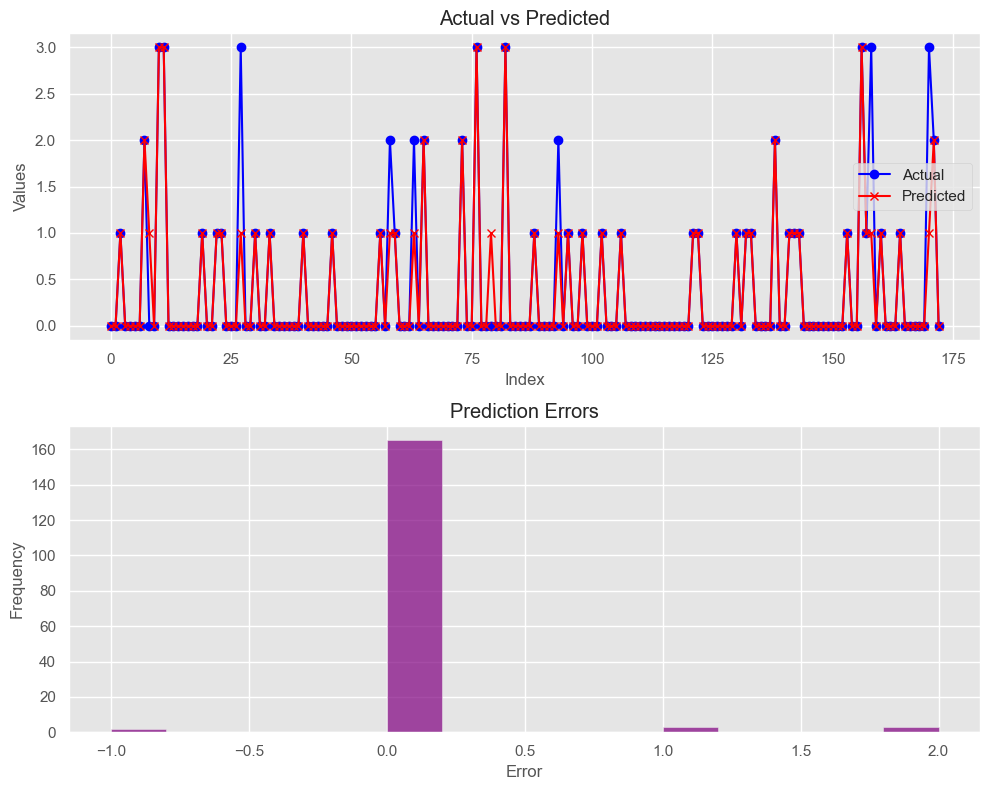

In [289]:
# Combining real and predicted values for comparison
df_results = pd.concat([df_x, df_y_test, df_y_pred], axis=1)

# Setting the chart style
plt.style.use('ggplot')

# Creating subgraphs
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Graph of real and predicted values
ax[0].plot(df_y_test.index, df_y_test['Actual'], label='Actual', color='blue', marker='o')
ax[0].plot(df_y_pred.index, df_y_pred['Predicted'], label='Predicted', color='red', marker='x')
ax[0].set_title('Actual vs Predicted')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Values')
ax[0].legend()

# Error histogram (difference between real and predicted values)
errors = df_y_test['Actual'] - df_y_pred['Predicted']
ax[1].hist(errors, bins=15, color='purple', alpha=0.7)
ax[1].set_title('Prediction Errors')
ax[1].set_xlabel('Error')
ax[1].set_ylabel('Frequency')

# Settings to improve the display
plt.tight_layout()

# Show the graph
plt.show()

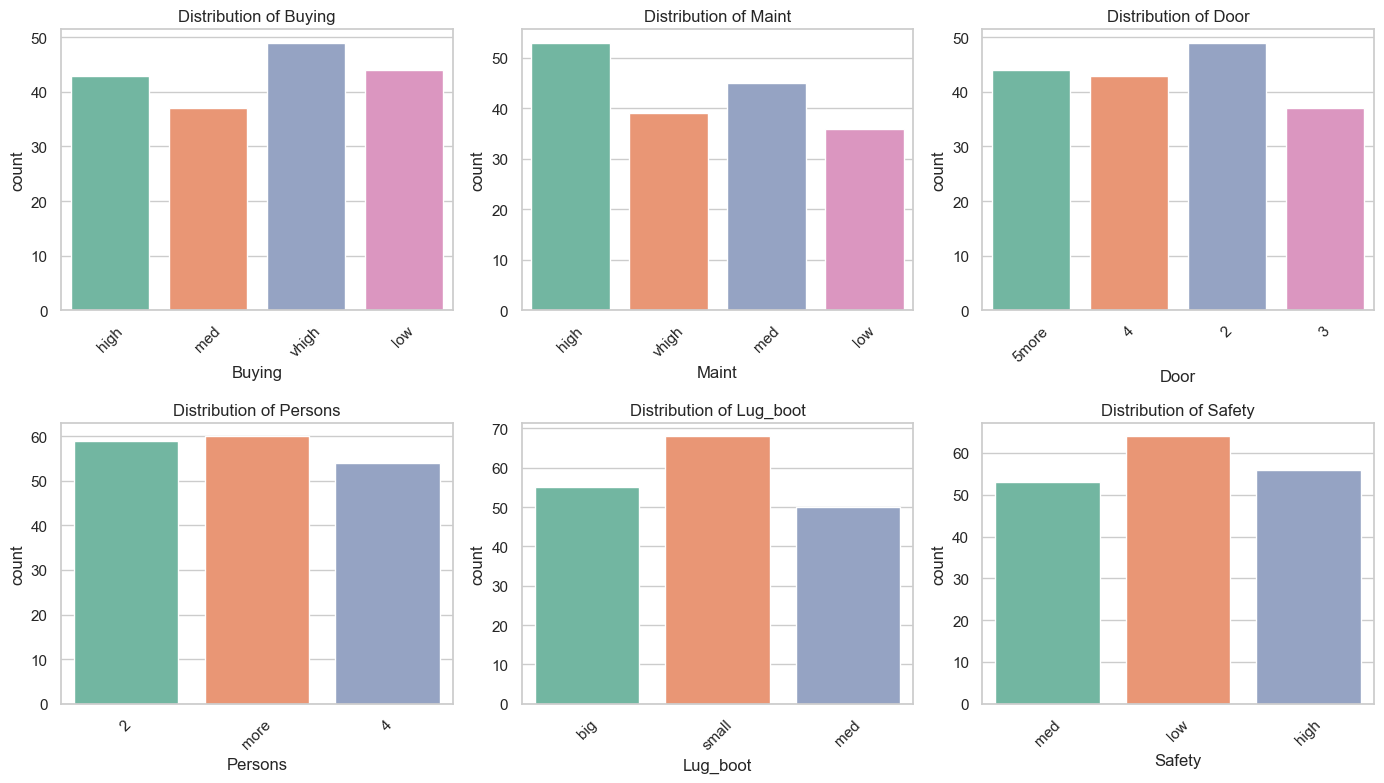

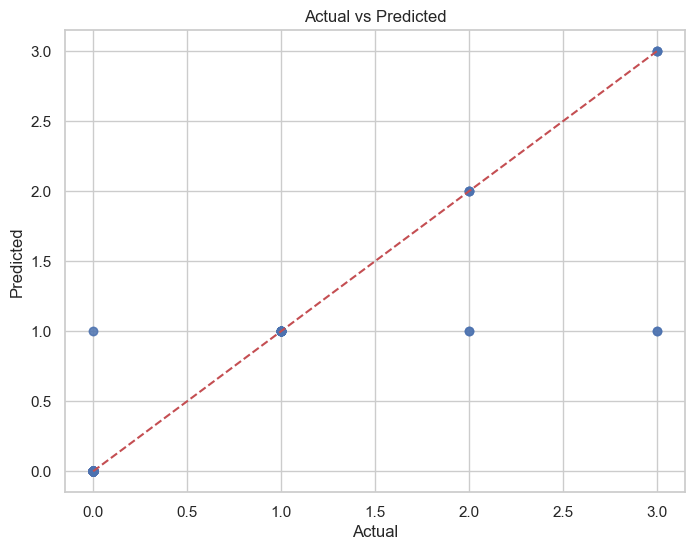

In [290]:
# Creating a shared DataFrame
df_combined = pd.concat([df_x, df_y_test, df_y_pred], axis=1)

# Setting the chart style
sns.set(style="whitegrid")

#1. Visualization of categorical data
plt.figure(figsize=(14, 8))




df_x['Buying'] = df_x['Buying'].replace(buying_dict)
df_x['Maint'] = df_x['Maint'].replace(maint_dict)
df_x['Door'] = df_x['Door'].replace(doors_dict)
df_x['Persons'] = df_x['Persons'].replace(persons_dict)
df_x['Lug_boot'] = df_x['Lug_boot'].replace(lug_boot_dict)
df_x['Safety'] = df_x['Safety'].replace(safety_dict)

for i, column in enumerate(df_x.columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df_x, palette="Set2", hue=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Comparison of actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(df_y_test, df_y_pred, alpha=0.6, color="b")
plt.plot([df_y_test.min(), df_y_test.max()], [df_y_test.min(), df_y_test.max()], 'r--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

Definitions

**True Positives (TP)**: Number of correct predictions for a particular class (diagonal elements).

**False Positives (FP)**: Number of instances predicted as a given class but actually belong to another class (off-diagonal column values for that class).

**False Negatives (FN)**: Number of instances that actually belong to a class but were predicted as another class (off-diagonal row values for that class).

**True Negatives (TN)**: All remaining instances that neither belong to the class nor were predicted as the class (all other cells not in the row or column for that class).

Confusion Matrix:
 [[128   2   0   0]
 [  0  27   0   0]
 [  0   3   5   0]
 [  0   3   0   5]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.77      1.00      0.87        27
           2       1.00      0.62      0.77         8
           3       1.00      0.62      0.77         8

    accuracy                           0.95       173
   macro avg       0.94      0.81      0.85       173
weighted avg       0.96      0.95      0.95       173



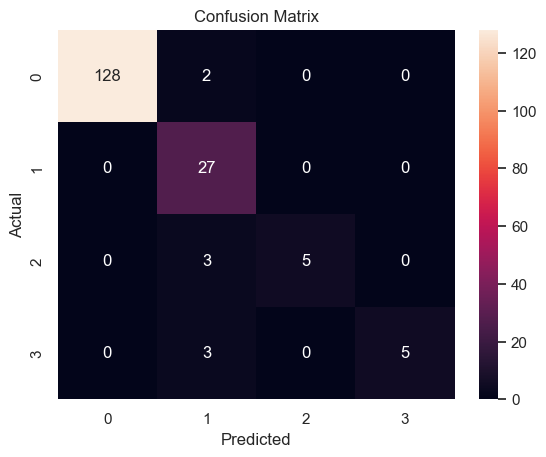

Accuracy: 0.953757225433526
F1-score: 0.95269404278593
Recall: 0.953757225433526


In [291]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report

# Confusion Matrix
cm = confusion_matrix(df_y_test['Actual'], df_y_pred['Predicted'])
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted') 
print("F1-score:", f1)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

 AUC (Area Under Curve)  Receiver Operating Characteristic

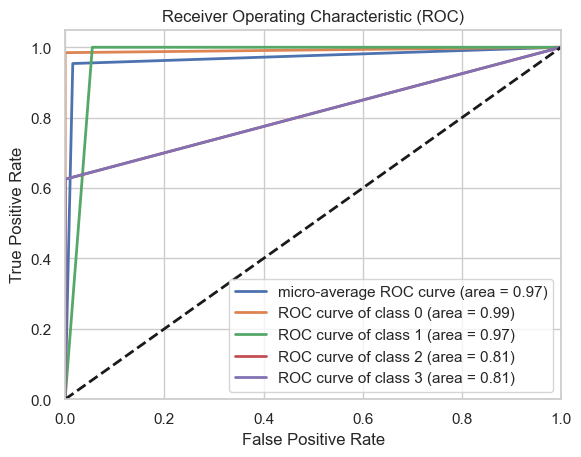

In [295]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output (y_test and y_pred)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Binarizing the actual labels
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  # Binarizing the predicted labels

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 4  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {:.2f})'.format(roc_auc["micro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]), linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

